In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('games.csv')

In [9]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [64]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [24]:
 df.dropna(inplace = True)

In [25]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

<AxesSubplot:>

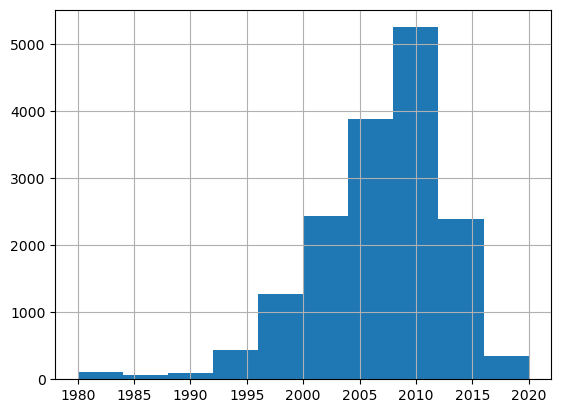

In [26]:
df.Year.hist()

In [50]:
df.Platform.value_counts(normalize = True).mul(100)


DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: Platform, dtype: float64

In [74]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [61]:
for_mode.mode()

0    0.006138
Name: Publisher, dtype: float64

In [57]:
import scipy.stats as sps

In [60]:
sps.mode(df.Publisher.value_counts(normalize = True).mul(100))

C:\Users\бвс\AppData\Local\Temp\ipykernel_6328\4248749840.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  sps.mode(df.Publisher.value_counts(normalize = True).mul(100))


ModeResult(mode=array([0.00613836]), count=array([192]))

In [67]:
Nintendo = df.query("Publisher == 'Nintendo'")

In [100]:
columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']

In [101]:
for column in columns:
    print('mean' + ' '+ str(df[column].mean()),format(column))
    print( 'median' + ' '+ str(df[column].median()),format(column))
    print( 'std' + ' '+ str(df[column].std()),format(column))

mean 0.2656466760788366 NA_Sales
median 0.08 NA_Sales
std 0.8224321259140539 NA_Sales
mean 0.14773126266039754 EU_Sales
median 0.02 EU_Sales
std 0.5093029304675051 EU_Sales
mean 0.07883309802958094 JP_Sales
median 0.0 JP_Sales
std 0.31187949983659996 JP_Sales
mean 0.048426124854206894 Other_Sales
median 0.01 Other_Sales
std 0.1900828622648267 Other_Sales
mean 0.5409103185808628 Global_Sales
median 0.17 Global_Sales
std 1.5673445067837597 Global_Sales


In [102]:
 Nintendo.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Fighting', 'Action', 'Adventure',
       'Strategy'], dtype=object)

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

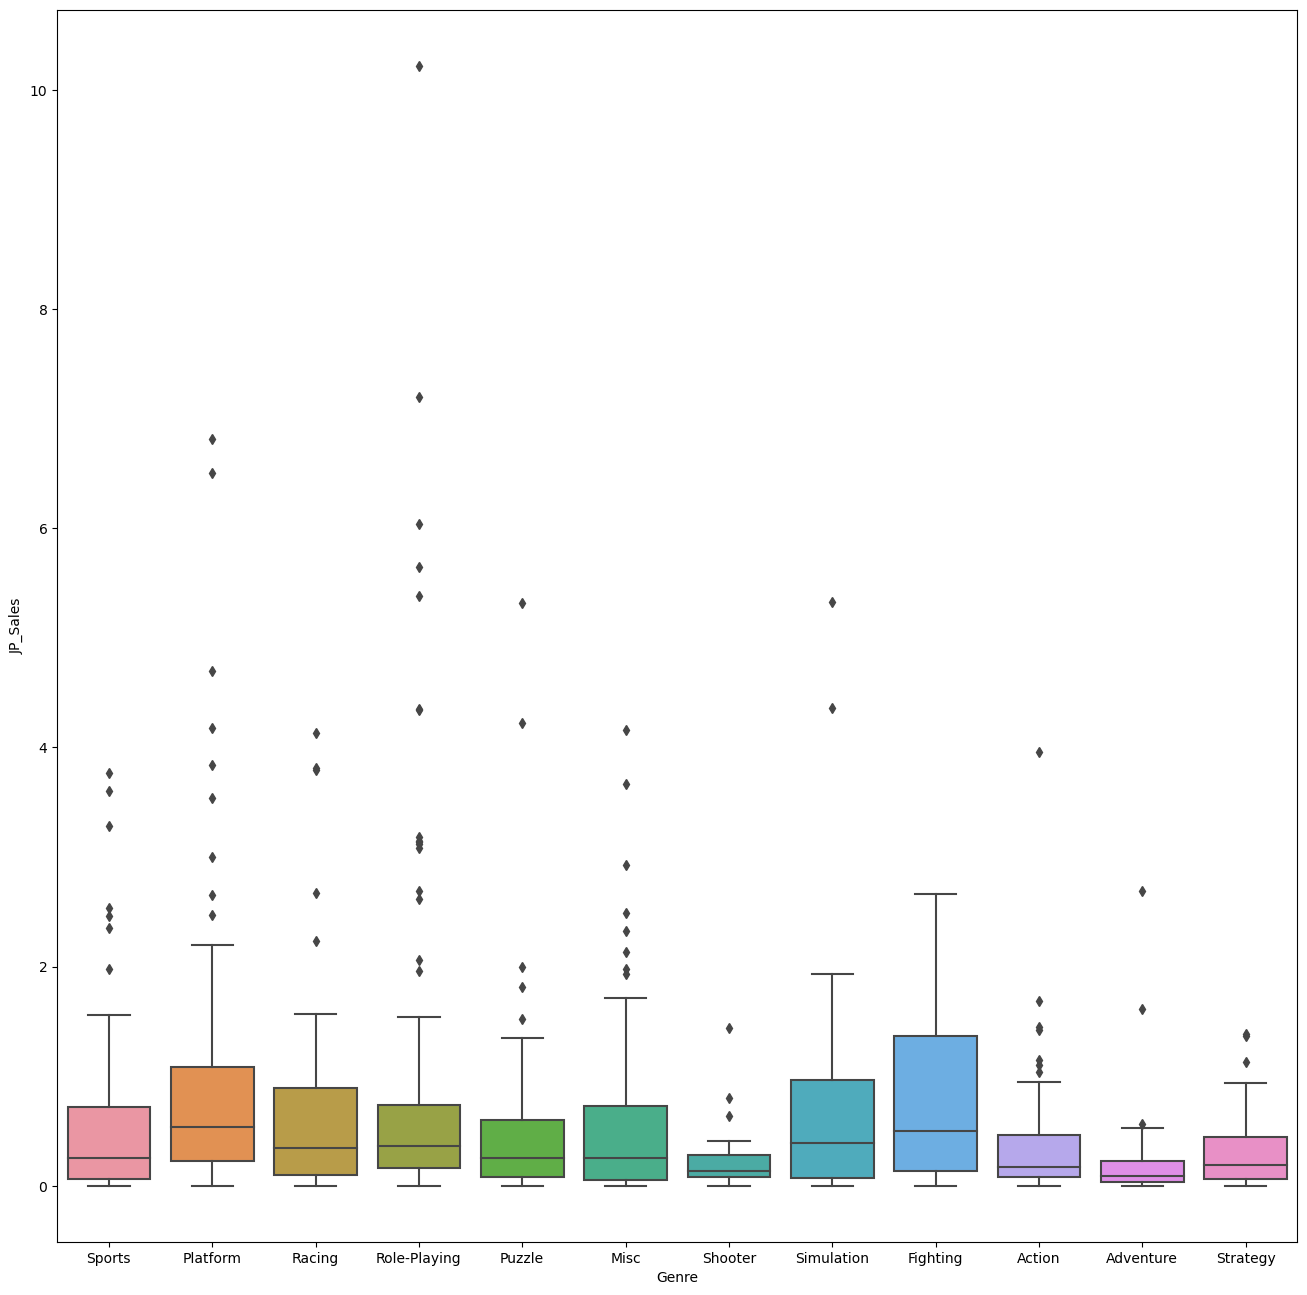

In [105]:
plt.figure(figsize=(16,16))
sns.boxplot(data=Nintendo, x="Genre", y="JP_Sales")

In [107]:
 genr = Nintendo.query("Genre == 'Fighting'or Genre == 'Simulation' or Genre == 'Platform' or  Genre == 'Racing' or Genre == 'Sports'")

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

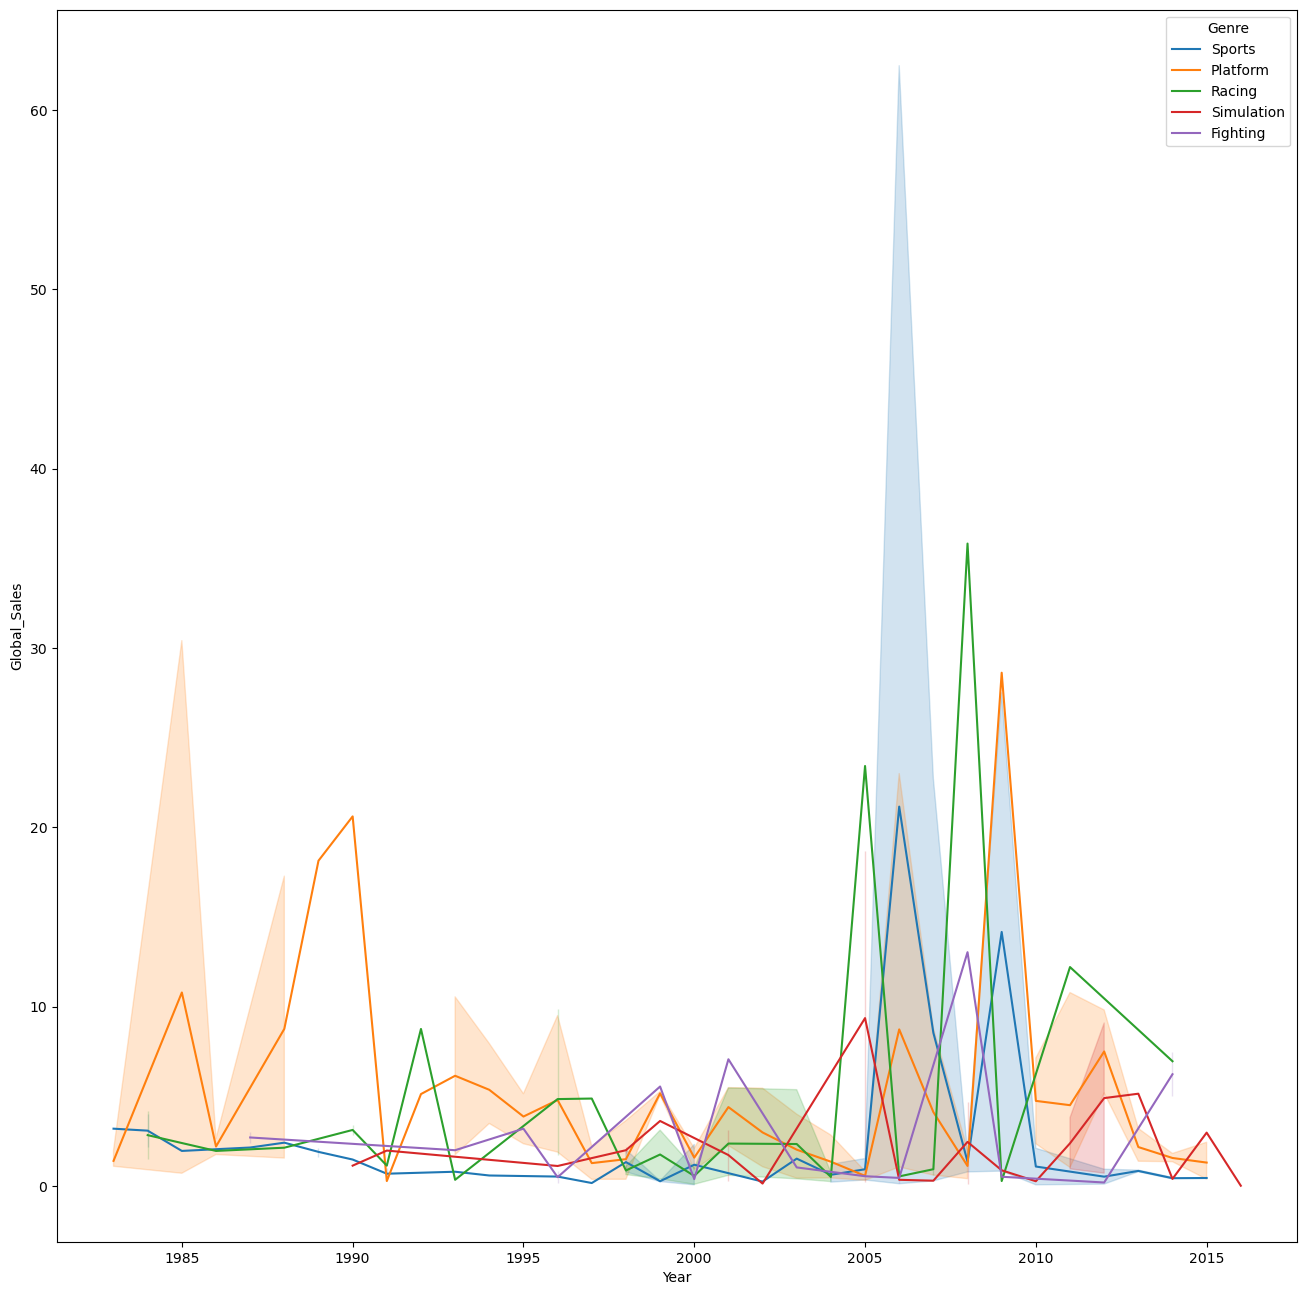

In [109]:
plt.figure(figsize=(16,16))
sns.lineplot(data=genr, x="Year", y="Global_Sales", hue="Genre")